In [1]:
import os
import nltk
import glob
import random
import pickle
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import LinearSVC
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
N = 100

In [3]:
raw_data_path = "Data/interim/"
os.chdir(raw_data_path)
raw_files = glob.glob("*.txt")
print(raw_files)

documents= []
all_words  = []


for f in raw_files:  
    t = open(f).read()
    for p in t.split('\n')[:1000]:
        p = list(set(p))
        all_words+=p
        documents.append((p, f[:-4]))

random.shuffle(documents)

word_features = list(all_words)

print("Sample:")
print(documents[1])
print(word_features[1])
print("# of Word Features:")
print(len(word_features))
print("# of Documents:")
print(len(documents))

def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains(%s)' % str(word)] = (word in document_words)
    return features

['drug_like.txt', 'non_drug.txt', 'drug.txt']
Sample:
(['C', '=', '2', '1', 'c', 'l', 'F', ')', '\\', '('], 'drug_like')
=
# of Word Features:
38137
# of Documents:
3000


In [4]:
%%time
featuresets = [(document_features(d), c) for (d,c) in documents]

train_set, test_set = featuresets[N:], featuresets[:N]
print('Train set :',len(train_set), '\nTest set :', len(test_set))

os.chdir('../')

classifier = nltk.NaiveBayesClassifier.train(train_set)
print("NaiveBayes accuracy:", (nltk.classify.accuracy(classifier, test_set))*100)

LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(train_set)
print("LinearSVC_classifier accuracy:", (nltk.classify.accuracy(LinearSVC_classifier, test_set))*100)

MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(train_set)
print("MNB_classifier accuracy:", (nltk.classify.accuracy(MNB_classifier, test_set))*100)

Train set : 2900 
Test set : 100
NaiveBayes accuracy: 65.0
LinearSVC_classifier accuracy: 76.0
MNB_classifier accuracy: 61.0
CPU times: user 32.7 s, sys: 63.5 ms, total: 32.7 s
Wall time: 32.7 s


In [5]:
X = ['NaiveBayes ','LinearSVC','MNB']
Y = [nltk.classify.accuracy(classifier, test_set)*100, nltk.classify.accuracy(LinearSVC_classifier, test_set)*100, nltk.classify.accuracy(MNB_classifier, test_set)*100]

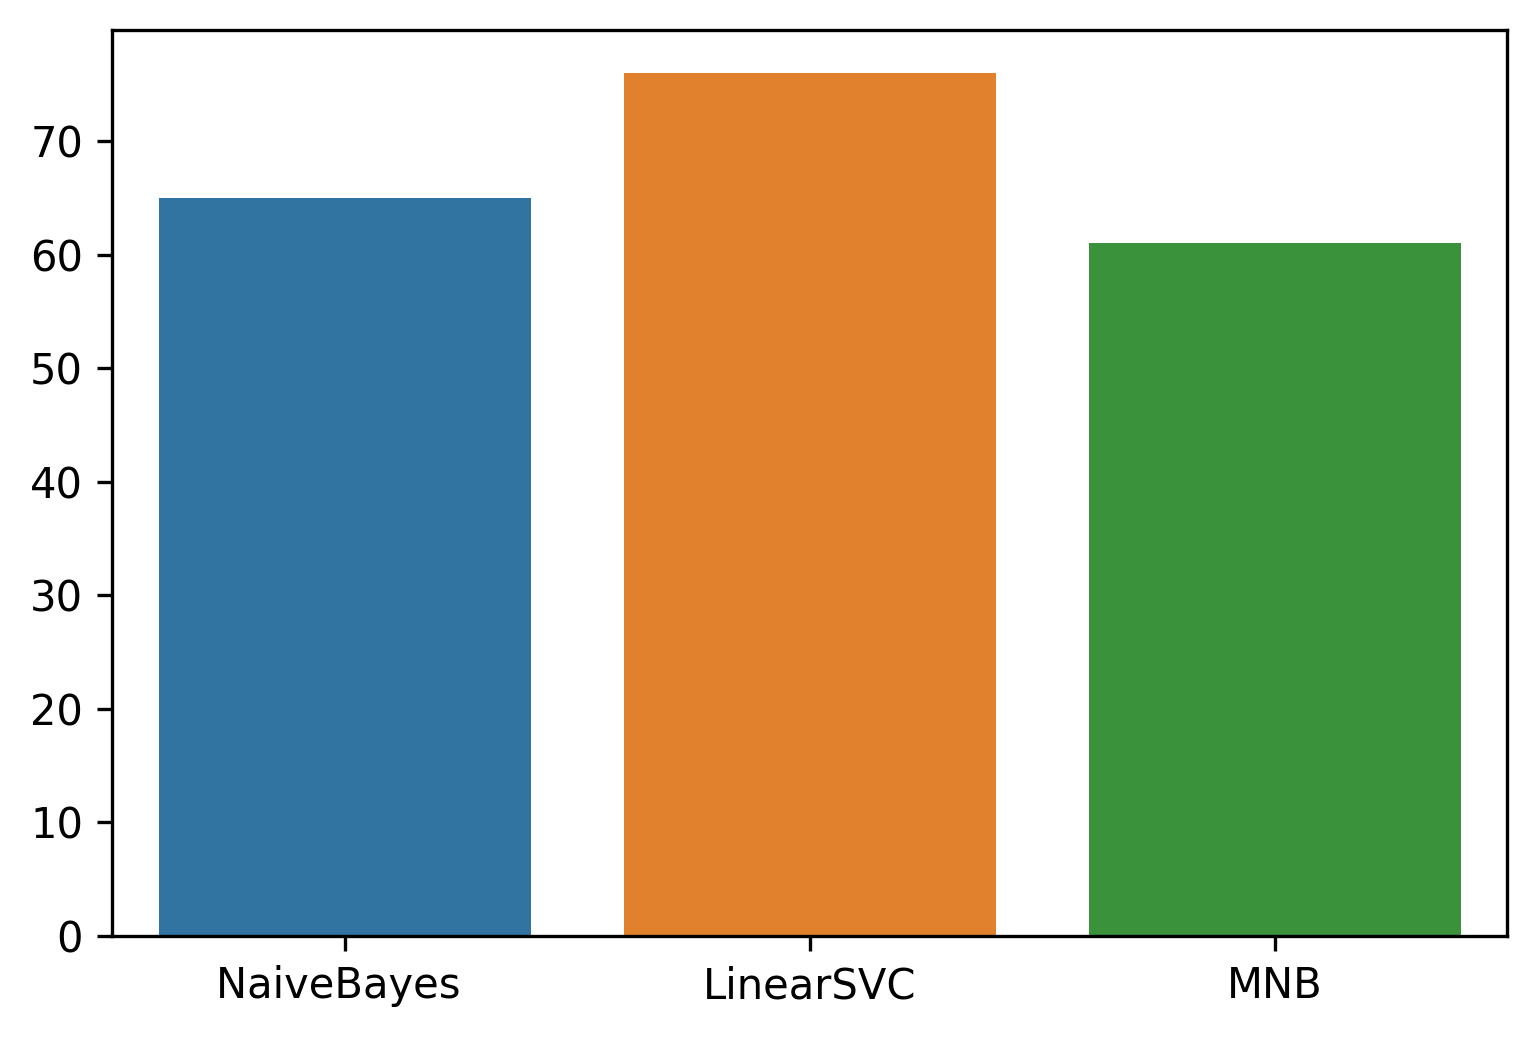

In [6]:
plt.figure(dpi=300)
ax = sns.barplot(x=X, y=Y)